In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import numpy as np

class KMeans:
    def __init__(self, K=3, max_iters=100, tol=1e-4):
        self.K = K
        self.max_iters = max_iters
        self.tol = tol  # tolerance for convergence
        self.centroids = None
        self.labels = None

    def fit(self, X):
        X = np.array(X)
        n_samples, n_features = X.shape

        # Step 1: Initialize centroids randomly
        random_indices = np.random.choice(n_samples, self.K, replace=False)
        self.centroids = X[random_indices]

        for _ in range(self.max_iters):
            # Step 2: Assign clusters
            distances = self._compute_distances(X)
            labels = np.argmin(distances, axis=1)

            # Step 3: Update centroids
            new_centroids = np.array([
                X[labels == k].mean(axis=0) if len(X[labels == k]) > 0 else self.centroids[k]
                for k in range(self.K)
            ])

            # Step 4: Check for convergence
            shift = np.linalg.norm(self.centroids - new_centroids, axis=1)
            if np.all(shift < self.tol):
                break

            self.centroids = new_centroids
            self.labels = labels

        self.labels = labels

    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=1)

    def _compute_distances(self, X):
        return np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)


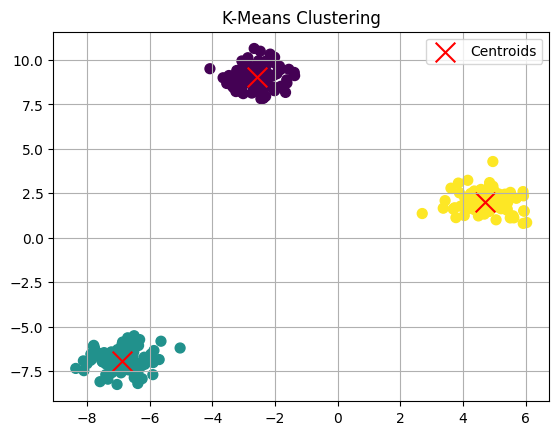

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic cluster data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=42)

# Fit model
kmeans = KMeans(K=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# Visualize results
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=50)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.grid(True)
plt.show()